<a href="https://colab.research.google.com/github/UIT19522547/Barebone-Language---Code-Example/blob/main/Recognizing_hand_written_digits.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Train model cho bài toán hand-written digits recognition theo example của sklearn

In [ ]:
print(__doc__)
 
# Author: Gael Varoquaux <gael dot varoquaux at normalesup dot org>
# License: BSD 3 clause
 
# Standard scientific Python imports
import matplotlib.pyplot as plt
 
# Import datasets, classifiers and performance metrics
from sklearn import datasets, svm, metrics
from sklearn.model_selection import train_test_split

Automatically created module for IPython interactive environment


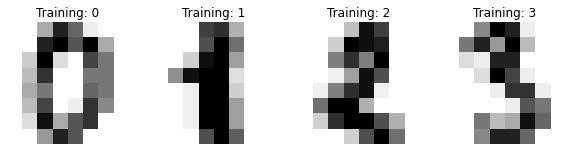

In [ ]:
digits = datasets.load_digits()

_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('Training: %i' % label)

In [ ]:
# flatten the images
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

# Create a classifier: a support vector classifier
clf = svm.SVC(gamma=0.001)

# Split data into 50% train and 50% test subsets
X_train, X_test, y_train, y_test = train_test_split(
    data, digits.target, test_size=0.5, shuffle=False)

# Learn the digits on the train subset
clf.fit(X_train, y_train)

# Predict the value of the digit on the test subset
predicted = clf.predict(X_test)

In [ ]:
print(f"Classification report for classifier {clf}:\n"
      f"{metrics.classification_report(y_test, predicted)}\n")

Classification report for classifier SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False):
              precision    recall  f1-score   support

           0       1.00      0.99      0.99        88
           1       0.99      0.97      0.98        91
           2       0.99      0.99      0.99        86
           3       0.98      0.87      0.92        91
           4       0.99      0.96      0.97        92
           5       0.95      0.97      0.96        91
           6       0.99      0.99      0.99        91
           7       0.96      0.99      0.97        89
           8       0.94      1.00      0.97        88
           9       0.93      0.98      0.95        92

    accuracy                           0.97       899
   macro avg       0.97      0.97      0.97       899
weighted a

Confusion matrix:
[[87  0  0  0  1  0  0  0  0  0]
 [ 0 88  1  0  0  0  0  0  1  1]
 [ 0  0 85  1  0  0  0  0  0  0]
 [ 0  0  0 79  0  3  0  4  5  0]
 [ 0  0  0  0 88  0  0  0  0  4]
 [ 0  0  0  0  0 88  1  0  0  2]
 [ 0  1  0  0  0  0 90  0  0  0]
 [ 0  0  0  0  0  1  0 88  0  0]
 [ 0  0  0  0  0  0  0  0 88  0]
 [ 0  0  0  1  0  1  0  0  0 90]]


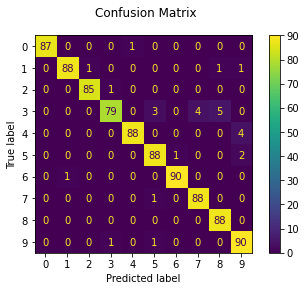

In [ ]:
disp = metrics.plot_confusion_matrix(clf, X_test, y_test)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()

#Thử nghiệm của nhóm tìm ra cách xử lý hình ảnh chụp từ camera colab để thực hiện predict

In [ ]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode
 
def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);
 
      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});
 
      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();
 
      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);
 
      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);
 
      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

<IPython.core.display.Javascript object>

Saved to photo.jpg


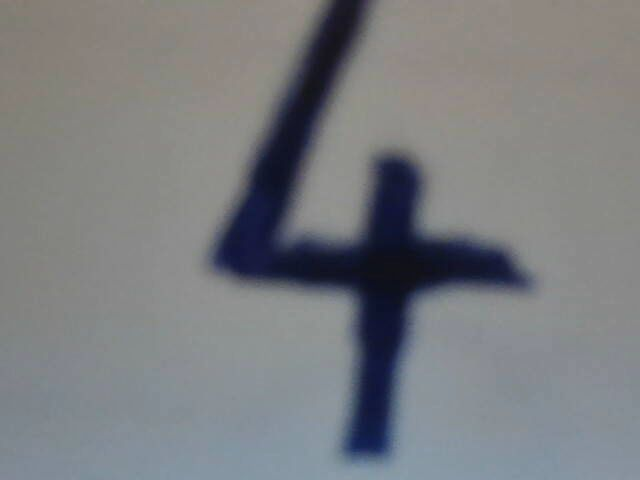

In [ ]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))
  #Nguồn: https://stackoverflow.com/questions/54389727/opening-web-camera-in-google-colab

In [ ]:
import cv2

In [ ]:
image = cv2.imread('photo.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
ret, thresh_binary = cv2.threshold(image, 100, 255, cv2.THRESH_BINARY)
ret, thresh_binary = cv2.threshold(thresh_binary, 170, 255, cv2.THRESH_BINARY_INV)
resize1 = cv2.resize(thresh_binary, (8, 8), interpolation = cv2.INTER_AREA)
norm_image = cv2.normalize(resize1, None, alpha = 0, beta = 15, norm_type = cv2.NORM_MINMAX, dtype = cv2.CV_32F)
reshape = norm_image.reshape(-1, 64)

NameError: ignored

In [ ]:
reshape.shape

(1, 64)

In [ ]:
print(reshape)

[[ 0.         0.         0.         1.8518518  8.580247   0.
   0.         0.         0.         0.         0.         7.2222223
   3.3950617  0.         0.         0.         0.         0.
   0.        11.172839   2.4691358  1.5432099  0.         0.
   0.         0.         1.9753087 10.987655   7.0987654  5.123457
   0.         0.         0.         0.         3.3950617 12.283951
  15.        14.012345   5.987654   0.         0.         0.
   0.         0.         9.012345   2.0370371  0.         0.
   0.         0.         0.         0.         8.765432   0.
   0.         0.         0.         0.         0.         0.
   5.8024693  0.         0.         0.       ]]


In [ ]:
predict = clf.predict(reshape)
print(predict)

[4]


In [ ]:
#Các thư viện xử lý ảnh
from IPython.display import Image
from google.colab.patches import cv2_imshow
import os
import numpy as np

In [ ]:
#Mount drive to save image
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
a=np.array([1,2,3])
b=[]
b.append(a)
b=np.array(b)
print(type(b))

<class 'numpy.ndarray'>


#Tạo test set với 60 ảnh chụp thực tế
## Sửa từ phần này trở xuống nè. Viết kết luận giúp Thành luôn nha. Cảm ơn mọi người. Có gì hông hiểu nhắn Thành nha

In [ ]:
#Import thư viện
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
%matplotlib inline

##Chụp trực tiếp từ colab

In [ ]:
def get_photo(name):
  try:
    filename = take_photo()
    print('Saved to {}'.format(filename))
    
    # Show the image which was just taken.
    #display(Image(filename))
    #save image to drive 
      #https://www.geeksforgeeks.org/python-opencv-cv2-imwrite-method/
    directory = r'/content/gdrive/MyDrive/Colab_file/Recognizing-hand-written-digits'
    os.chdir(directory)
    img=cv2.imread(filename)
    cv2.imwrite(name, img)
  except Exception as err:
    # Errors will be thrown if the user does not have a webcam or if they do not
    # grant the page permission to access it.
    print(str(err))
    #Nguồn: https://stackoverflow.com/questions/54389727/opening-web-camera-in-google-colab
  return 0

In [ ]:
#Tạo dữ liệu dự đoán
def create_image(num_of_img):
  data=[]
  for i in ['one','two','three','four','five','six','seven','eight','nine']:
    for j in range(num_of_img):
      x=get_photo(i+str(j)+".png")
      data.append(x)
  data=np.array(data)
  return data

###Lấy test set đã chụp từ lần thử nghiệm đầu tiên từ github
Sau khi chụp ảnh từ colab, để có thể chạy trên những máy khác, nhóm đã lưu ảnh vào github.
<br>
Muốn chạy code cần clone ảnh từ link github vào colab

In [ ]:
!git clone https://github.com/UIT-19521183/CS114.L21.git
#git clone data test tu github

Cloning into 'CS114.L21'...
remote: Enumerating objects: 134, done.
remote: Counting objects: 100% (134/134), done.
remote: Compressing objects: 100% (115/115), done.
remote: Total 134 (delta 69), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (134/134), 1.99 MiB | 16.20 MiB/s, done.
Resolving deltas: 100% (69/69), done.


###Hàm load ảnh
Load các ảnh đã đã chụp lưu trong folder 

In [ ]:
#https://www.codegrepper.com/code-examples/python/how+to+load+images+from+folder+in+python
import cv2
import os

def load_images_from_folder(folder):
    images = []
    for i in range(10):
      for j in range(1,7):
        img = cv2.imread(folder + "/" + str(i) + " (" + str(j) + ").jpg")
        if img is not None:
            images.append(img)
    return images


###Bộ ảnh test set
Bên dưới là bộ test set 60 ảnh từ 0-9, mỗi chữ số là 6 ảnh khác nhau với kiểu viết khác nhau

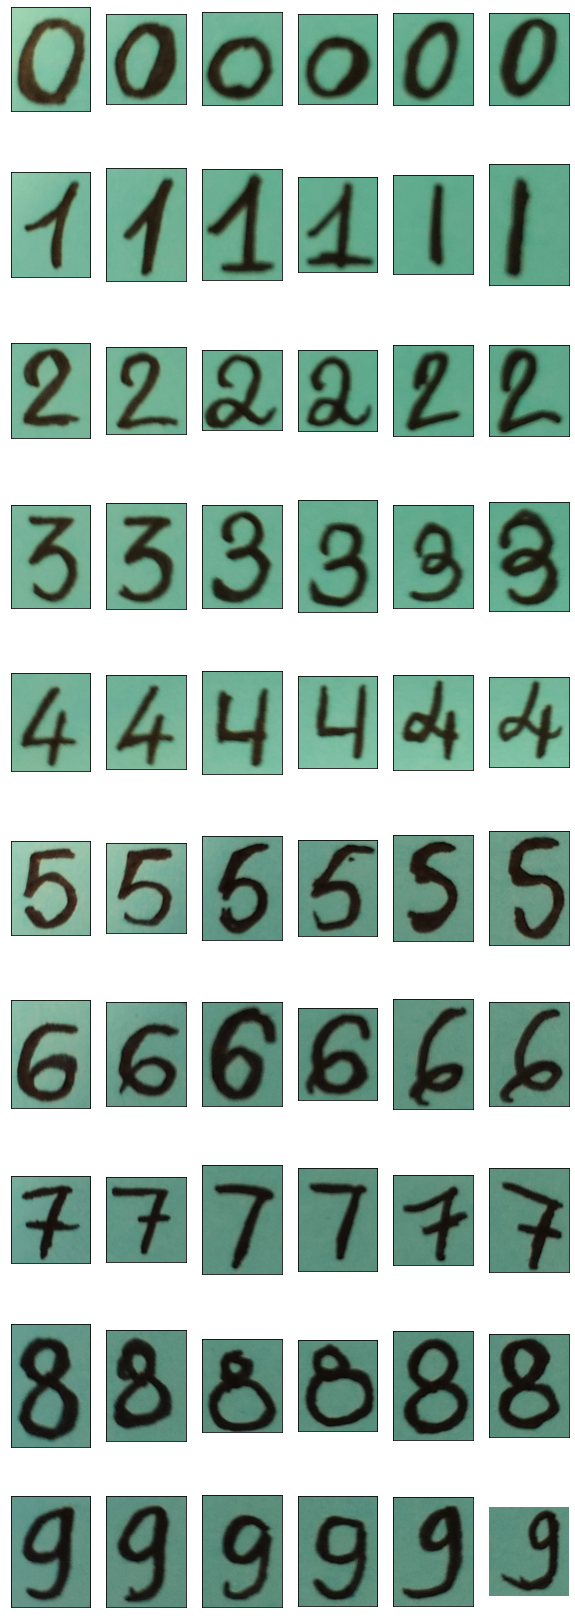

In [ ]:

#Show_all image muốn predict
#https://matplotlib.org/stable/gallery/subplots_axes_and_figures/subplots_demo.html
#Tạo ra subplot để vẽ nhiều ảnh cùng 1 figure. Có 60 ảnh, mỗi dòng sẽ biểu diễn 6 ảnh của cùng 1 con số => Tạo ra figure có số subplot 10x6
fig, axs = plt.subplots(10, 6,figsize=(10,30))
plt.axis('off')
for i in range(10):
  for j in range(6):
    #vẽ ảnh
    axs[i][j].imshow(image_PIL[i*6+j])
    #Ẩn đi các trục
    axs[i][j].axes.get_xaxis().set_visible(False)
    axs[i][j].axes.get_yaxis().set_visible(False)

###Gán label

In [ ]:
#Dựa vào data
label=[0,0,0,0,0,0,1,1,1,1,1,1,2,2,2,2,2,2,3,3,3,3,3,3,4,4,4,4,4,4,5,5,5,5,5,5,6,6,6,6,6,6,7,7,7,7,7,7,8,8,8,8,8,8,9,9,9,9,9,9]

In [ ]:
#Display ảnh bằng cv_2
#https://stackoverflow.com/questions/35180764/opencv-python-image-too-big-to-display
"""from google.colab.patches import cv2_imshow
def show_image(image_arr,scale_percent):
  width = int(image_arr.shape[1] * scale_percent / 100)
  height = int(image_arr.shape[0] * scale_percent / 100)
  dim = (width, height)
  # resize image
  resized = cv2.resize(image_arr, dim, interpolation = cv2.INTER_AREA)
  cv2_imshow(resized)
"""

###note

In [1]:
"""
#Create grayscale histogram
#https://datacarpentry.org/image-processing/05-creating-histograms/
#https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_histograms/py_histogram_begins/py_histogram_begins.html
from matplotlib import pyplot as plt
%matplotlib inline
"""im=image_data[25]
plt.hist(im.ravel(),256,[0,256]); plt.show()"""
fig, axs = plt.subplots(10, 6,figsize=(10,30))
plt.axis('off')
for i in range(9):
  for j in range(6):
    im=image_data[i*6+j]
    axs[i][j].hist(im.ravel(),256,[0,256]);
    axs[i][j].set_xlim([0,255])
    #axs[i][j].axes.get_xaxis().set_visible(False)
    #axs[i][j].axes.get_yaxis().set_visible(False)
    #axs.title("Label: "+str(label[i*3+j]))
plt.show()
"""


SyntaxError: ignored

###Xử lý ảnh/dữ liệu

####Cắt ảnh 
Khi nhìn vào ảnh trong training set ta có thể thấy rằng, các ảnh được cắt ra sát với con số trong ảnh.
<br>
Hàm cắt ảnh: 
* Tìm lề cần cắt 
* Rồi chỉnh lại kích thước phù hợp 

In [ ]:
def cropping(img):
  #maxUp,Down,Left,Right là các giới hạn cắt ảnh
  #maxUp và Down ở giữa của chiều cao = cao/2
  #maxRight và Left ở giữa của chiều 
  maxUp = int(img.shape[0]/2)
  maxDown = int(img.shape[0]/2)
  maxLeft = int(img.shape[1]/2)
  maxRight = int(img.shape[1]/2)
  h, w = img.shape

  #Tìm pixel có giá trị > 170 ở hàng cao nhất, maxUp sẽ = hàng cao nhất
  #maxDown sẽ = hàng của ô pixel có giá trị > 170 ở hàng thấp nhất
  #maxtRight sẽ = cột của ô pixel có giá trị > 170 ở cột lớn nhất (bên phải nhất)
  #maxtLeft sẽ = cột của ô pixel có giá trị > 170 ở cột nhỏ nhất (bên trái nhất) 
  for i in range(h):
    for j in range(w):
      if img[i][j] > 170:
        if maxUp >= i: maxUp = i
        if maxDown <= i: maxDown = i
        if maxLeft >= j: maxLeft = j
        if maxRight <= j: maxRight = j
  height = maxDown - maxUp
  width = maxRight - maxLeft

  #Chỉnh lại kích thước cắt: hướng đến cắt ảnh thành hình vuông để resize thành 8x8
  if height > width:
    maxleft = maxLeft - int((height - width)/2)
  else:
    maxRight = maxRight + int((width - height)/2)
  return img[maxUp:maxDown+1, maxLeft:maxRight+1]


Phần xử lý đã được nhóm nhắc tới trong phần thử nghiệm đầu tiên của nhóm với 1 ảnh chụp trực tiếp từ camera colab.
<br>
Phần xử lý bao gồm:
* Gray scale - chuyển ảnh sang ảnh xám
* Làm mờ ảnh (GaussianBlur): làm giảm độ nhiễu của ảnh
* Threshold để tách nền tăng độ chính xác: Do ảnh chụp bị ảnh hưởng bởi nhiều yếu tố (ánh sáng...) làm giảm độ chính xác, cần tách số ra và chỉnh giá trị nền thành 255
* Threshold tăng giá trị điểm ảnh xong rồi invert ảnh: để giá trị pixel tương đồng với training set 
* Norm giá trị ảnh xuống từ 0 đến 255 thành từ 0 đến 15: Do array dữ liệu ảnh trong dataset hand-writting digits pixel có giá trị từ [0,15]
* Reshape sang array (1,64): SVC nhập đầu vào dữ liệu để predict là vector 



In [ ]:
#Xử lý data
def data_processing(img):
  image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  gaussian = cv2.GaussianBlur(img, (5,5), cv2.BORDER_DEFAULT)
  _ , thresh_binary = cv2.threshold(image, 120, 255, cv2.THRESH_BINARY)
  _ , thresh_binary2 = cv2.threshold(thresh_binary, 170, 255, cv2.THRESH_BINARY_INV)
  crop = cropping(thresh_binary2)
  resize = cv2.resize(crop, (8, 8), interpolation = cv2.INTER_AREA)
  display_3_status(image,thresh_binary,thresh_binary2,resize)
  norm_image = cv2.normalize(resize, None, alpha = 0, beta = 15, norm_type = cv2.NORM_MINMAX, dtype = cv2.CV_32F)
  reshape = norm_image.reshape(-1, 64)
  return reshape

###Display 4 trạng thái của input để quan sát
4 trạng thái bao gồm:
* Ảnh gốc sau khi grayscale
* Ảnh sau khi threshold lần 1: đã làm mờ và tách nền
* Ảnh sau khi threshold lần 2: Chuyển về định dạng pixel tương đồng với training set
* Ảnh sau khi crop và resize thành kích thước như dataset dùng để training model

In [ ]:
"""import numpy as np
def display_3_status(im1,im2,im3,im4):
  x=np.concatenate((im1,im2,im3),axis=1)
  show_image(x,100)
  show_image(im4,2580)
  return"""

In [ ]:
from PIL import Image

def display_3_status(im1,im2,im3,im4):
  #Chuyển ảnh sang dạng để show bằng matplotlib
  #Dùng Image.fromarray chuyển ảnh từ định dạng array sang ảnh mà pyplot biểu diễn được
  img=[]
  img.append(Image.fromarray(im1))
  img.append(Image.fromarray(im2))
  img.append(Image.fromarray(im3))
  img.append(Image.fromarray(im4))
  fig,axs=plt.subplots(ncols=4,figsize=(20,10))
  for i in range(4):
    axs[i].imshow(img[i],cmap=plt.cm.gray_r,interpolation='nearest')
    axs[i].axes.get_xaxis().set_visible(False)
    axs[i].axes.get_yaxis().set_visible(False)
  #Đặt tiêu đề trạng thái cho từng ảnh
  axs[0].title.set_text("After grayscale") #Ảnh gốc sau khi grayscale
  axs[1].title.set_text("After threshold 1") #Ảnh trên sau khi làm mờ và tách nền
  axs[2].title.set_text("After threshold 2") #Ảnh đã tách nền chuyển về định dạng pixel tương đồng với training set
  axs[3].title.set_text("After crop and resize to 8x8") #Ảnh đã crop và resize
  plt.show()
  return 0
  

###Hàm chính để quan sát 4 trạng thái trong lúc xử lý ảnh + kết quả khi predict bằng model SVC + Label thực tế của dữ liệu

In [ ]:
def result_predicted(img,i):
  #Xử lý ảnh
  reshape=data_processing(img)
  #Tiến hành predict
  predicted=clf.predict(reshape)
  x=predicted
  #In ra kết quả predict
  print("Result predicted:",predicted)
  #In ra real label để đối chiếu
  print("Real label:",label[i])
  return x


#Kết quả dự đoán 60 số đã chụp

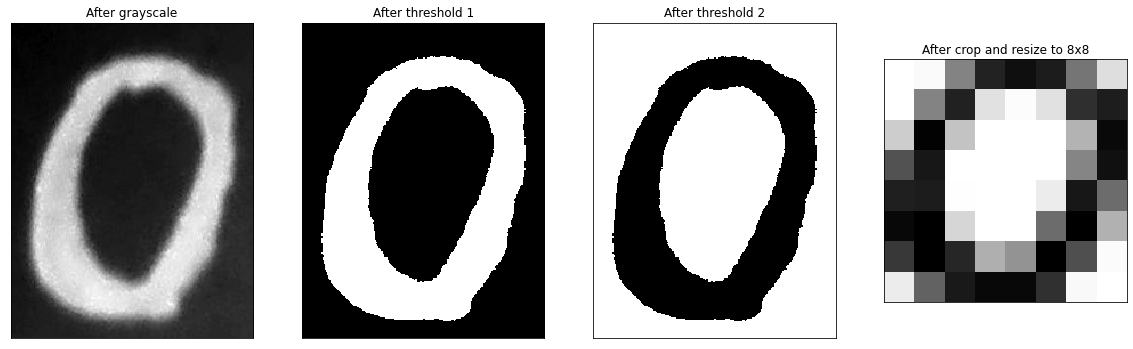

Result predicted: [1]
Real label: 0


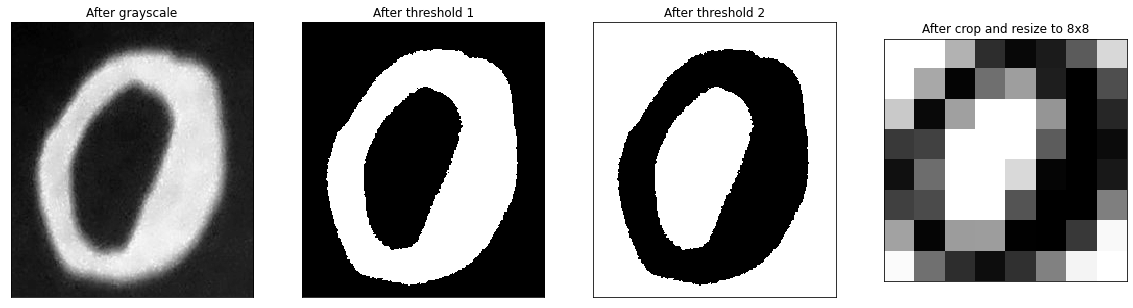

Result predicted: [1]
Real label: 0


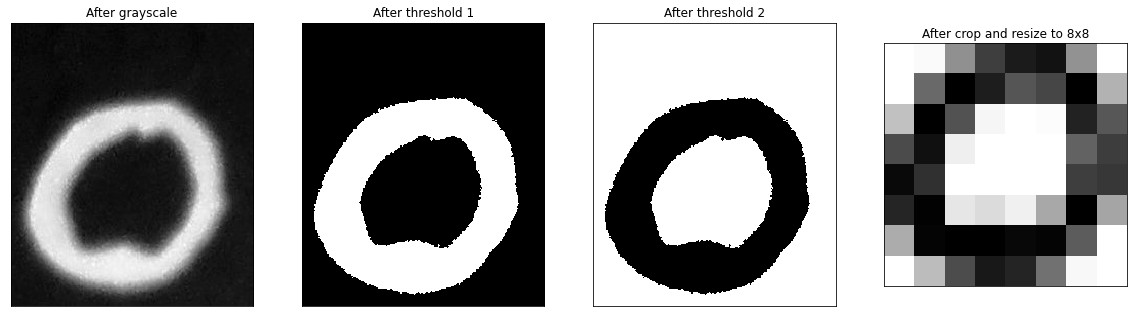

Result predicted: [2]
Real label: 0


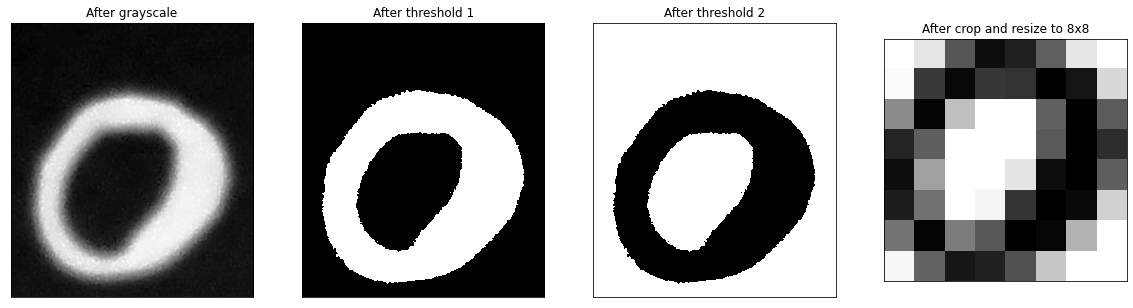

Result predicted: [5]
Real label: 0


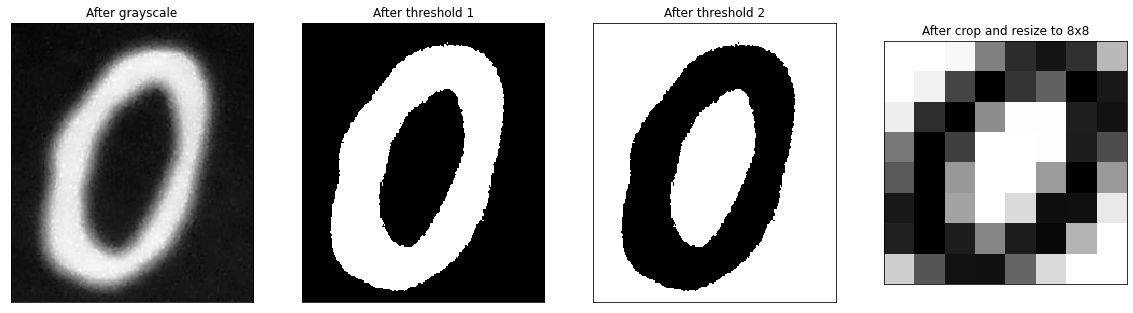

Result predicted: [5]
Real label: 0


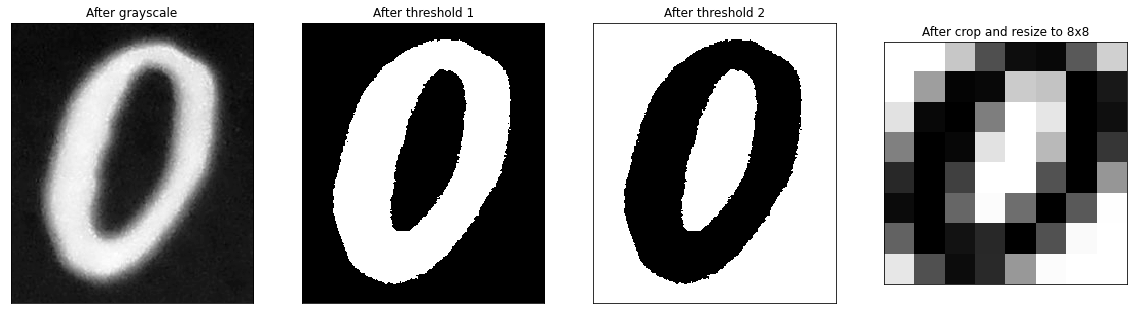

Result predicted: [5]
Real label: 0


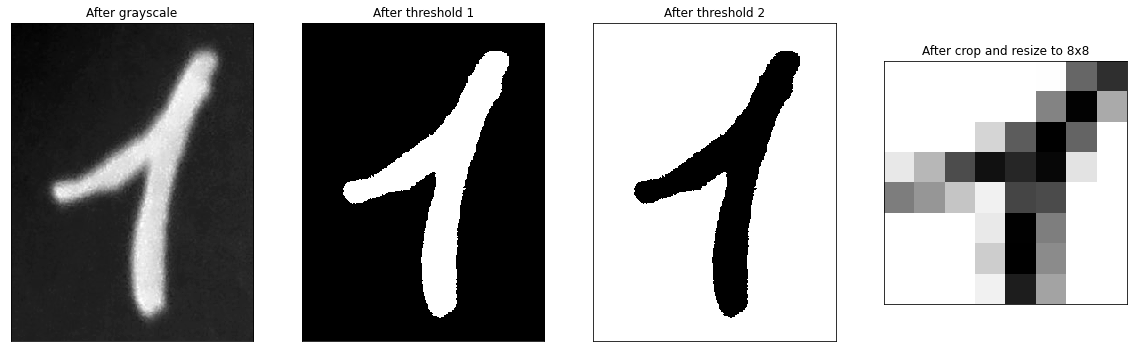

Result predicted: [1]
Real label: 1


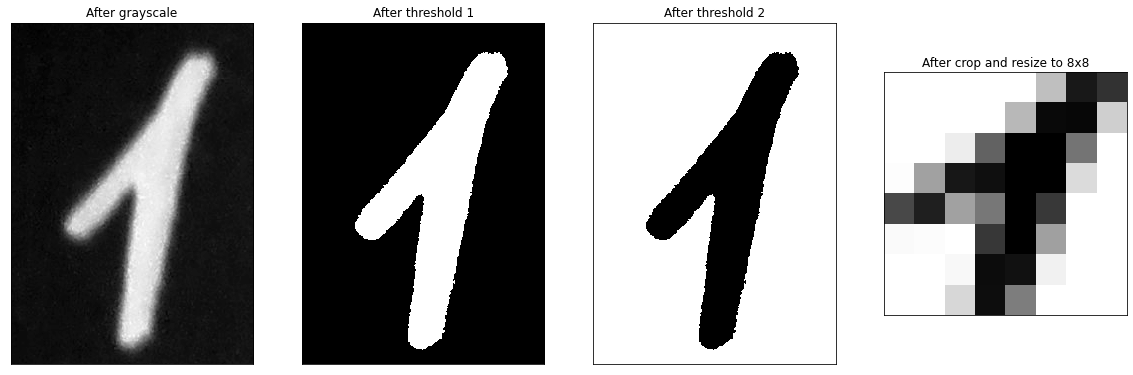

Result predicted: [1]
Real label: 1


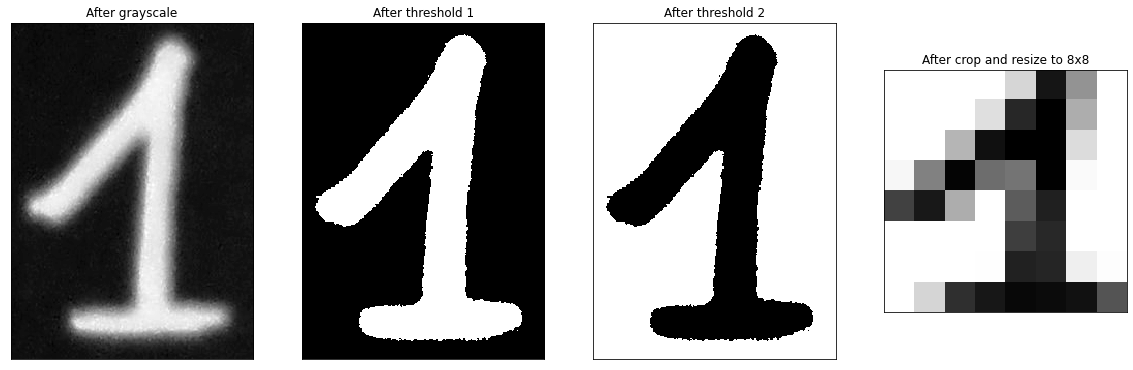

Result predicted: [1]
Real label: 1


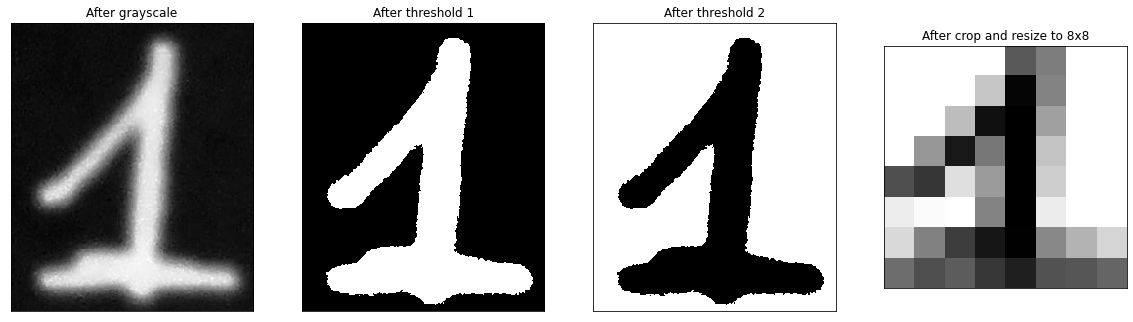

Result predicted: [1]
Real label: 1


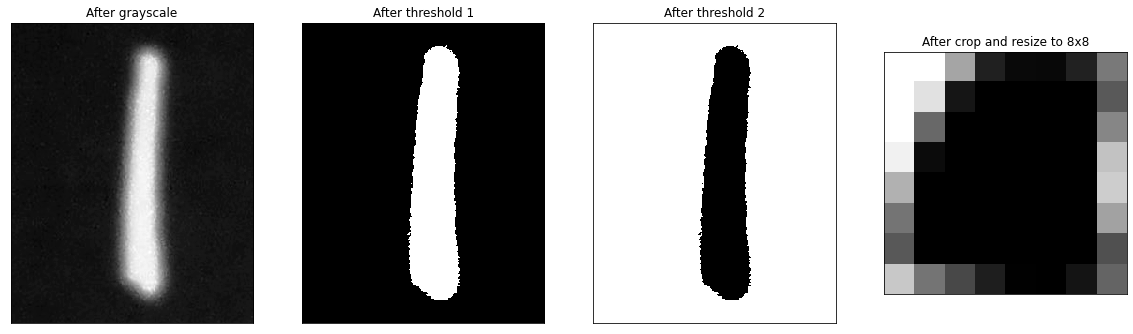

Result predicted: [1]
Real label: 1


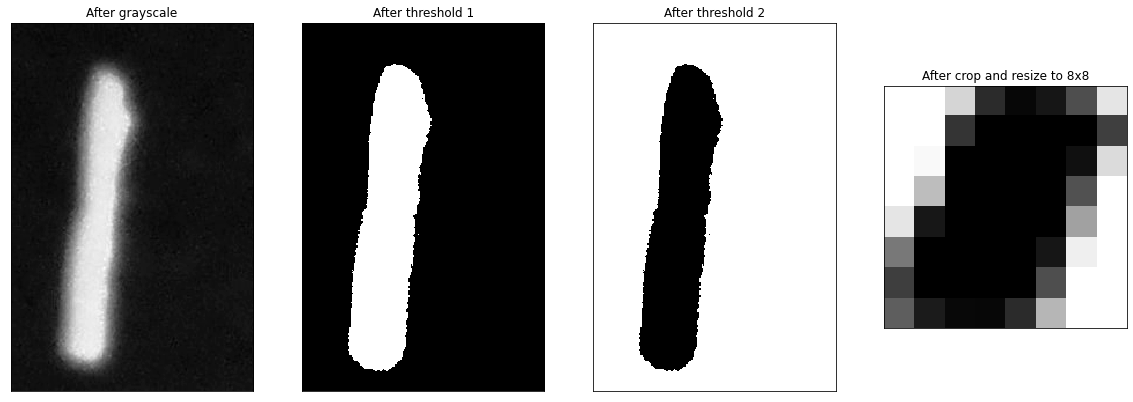

Result predicted: [1]
Real label: 1


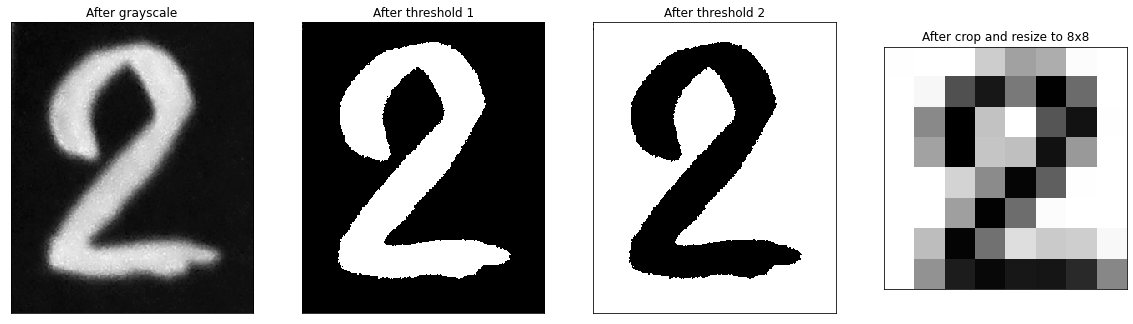

Result predicted: [2]
Real label: 2


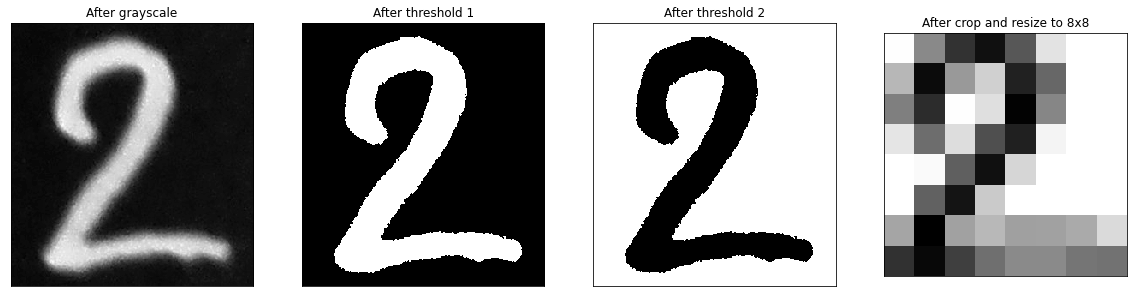

Result predicted: [2]
Real label: 2


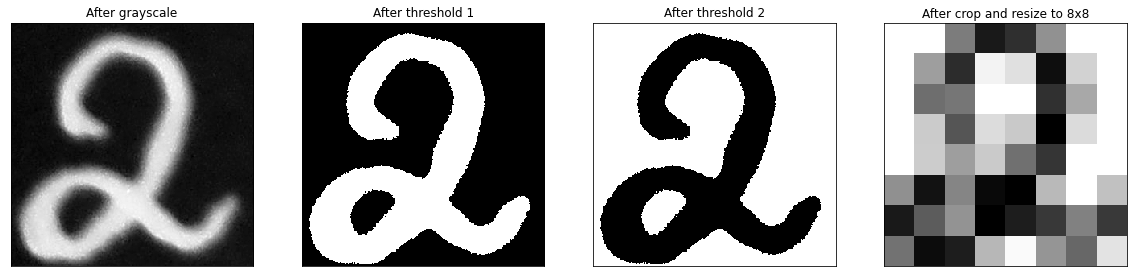

Result predicted: [2]
Real label: 2


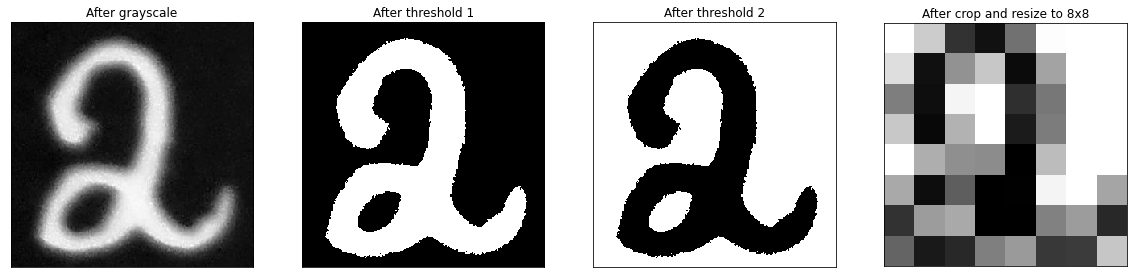

Result predicted: [2]
Real label: 2


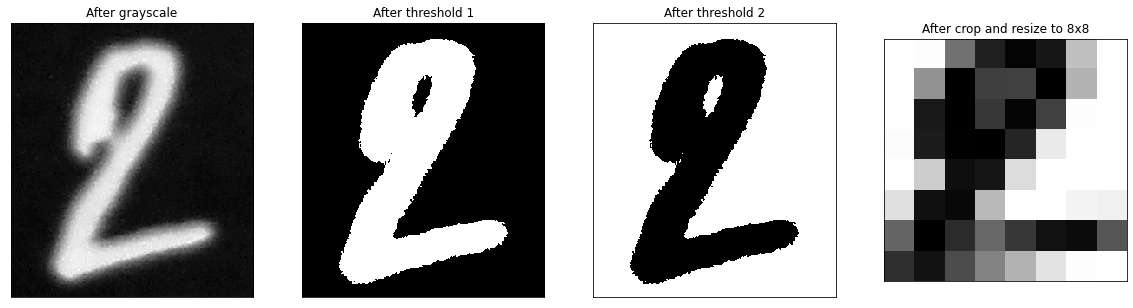

Result predicted: [5]
Real label: 2


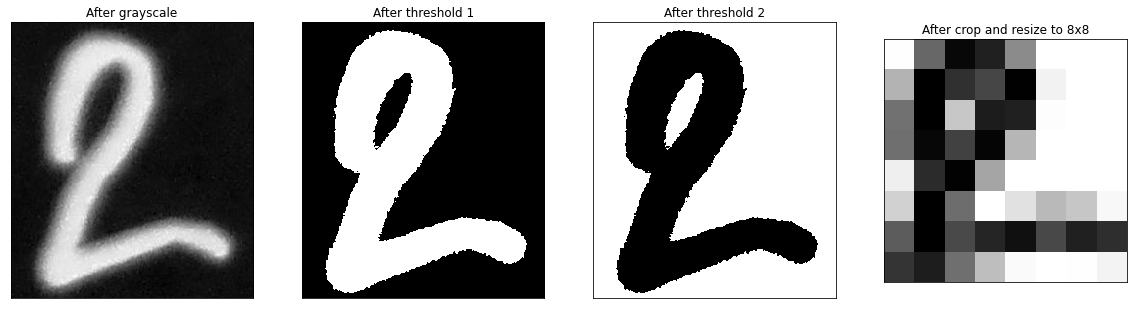

Result predicted: [5]
Real label: 2


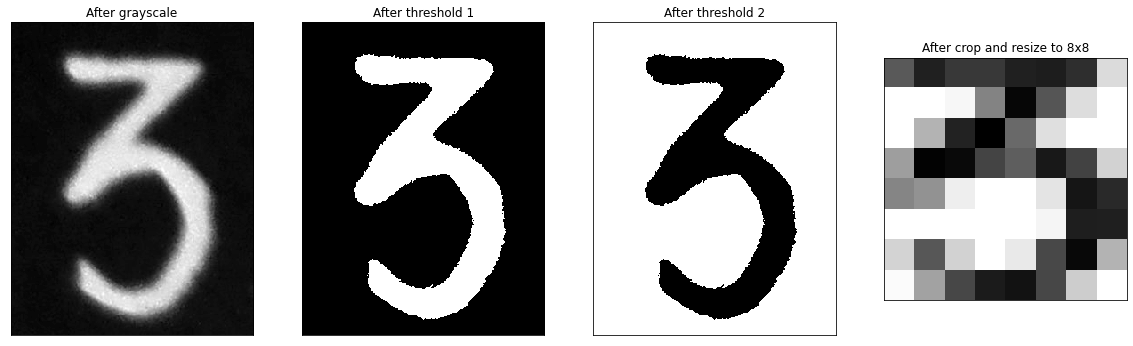

Result predicted: [5]
Real label: 3


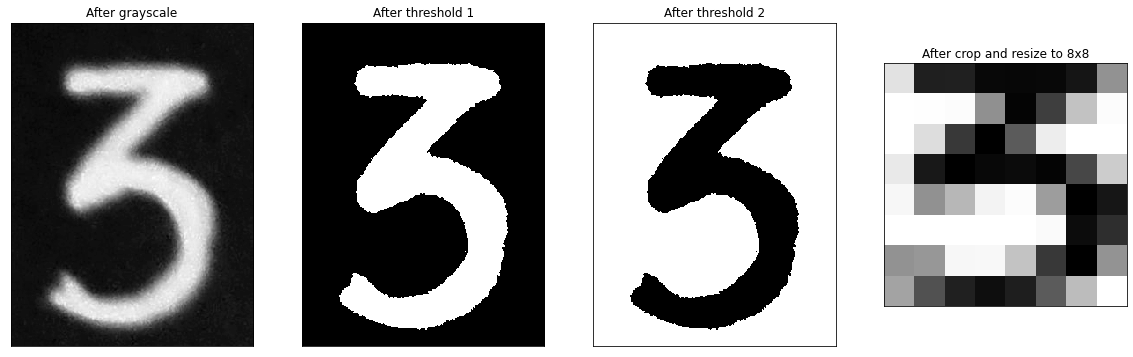

Result predicted: [5]
Real label: 3


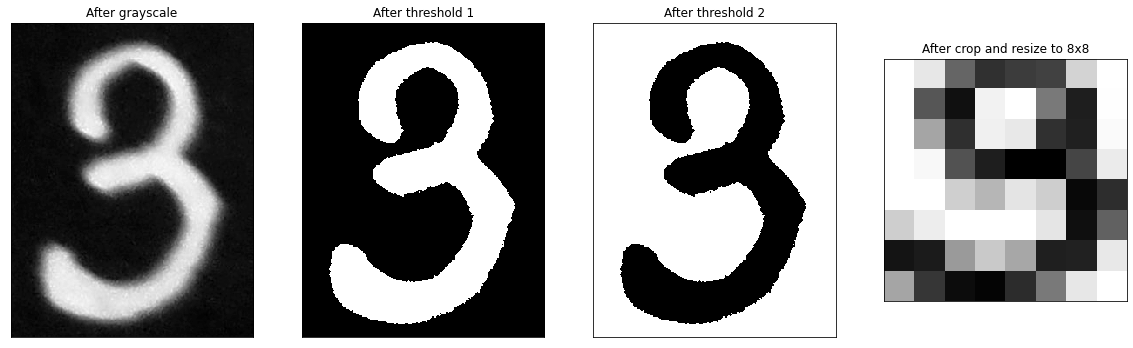

Result predicted: [9]
Real label: 3


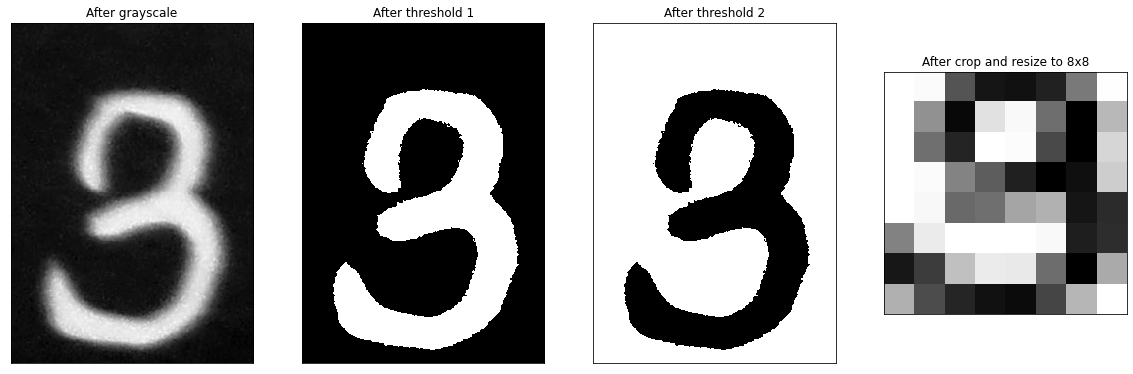

Result predicted: [9]
Real label: 3


Result predicted: [9]
Real label: 3


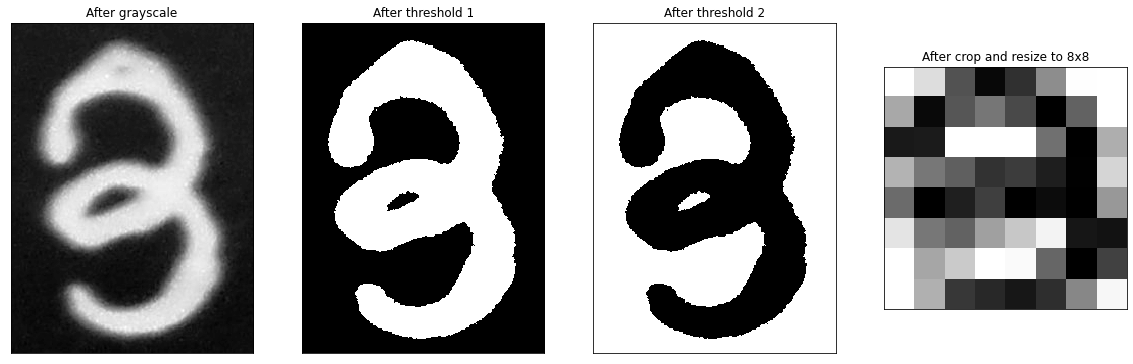

Result predicted: [9]
Real label: 3


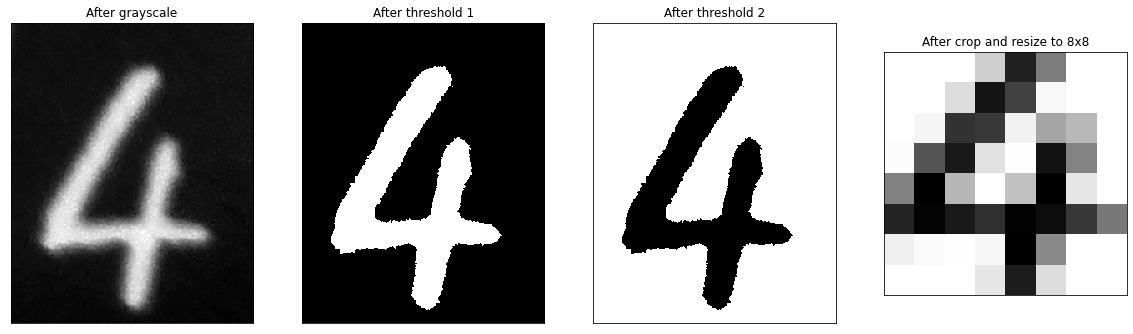

Result predicted: [4]
Real label: 4


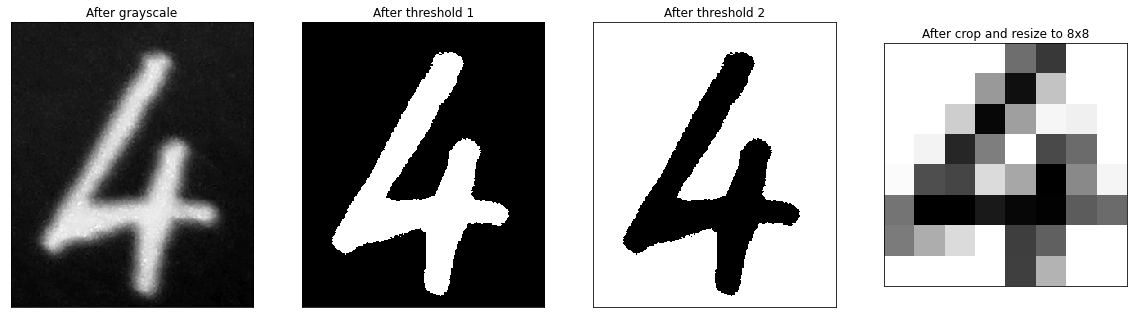

Result predicted: [4]
Real label: 4


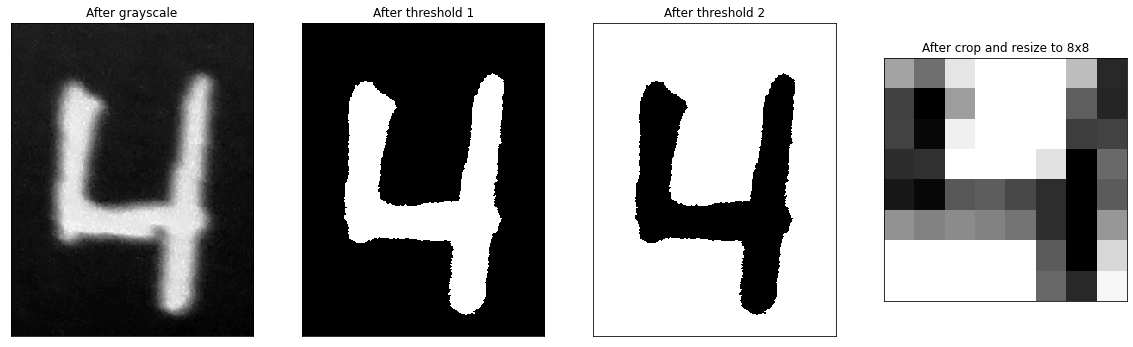

Result predicted: [1]
Real label: 4


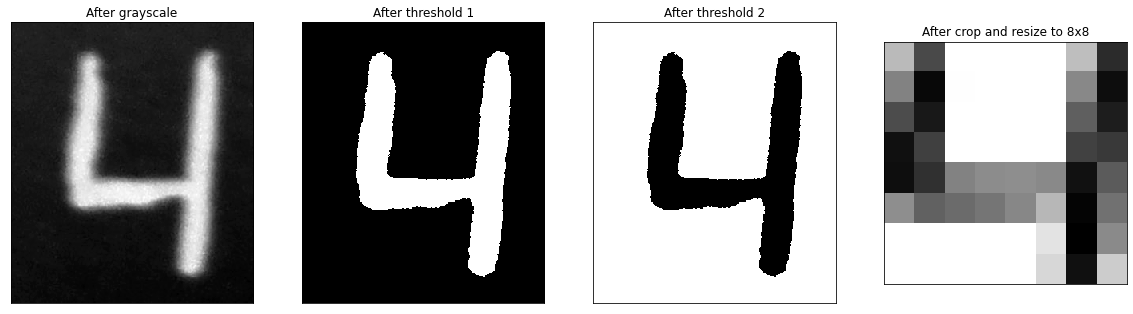

Result predicted: [1]
Real label: 4


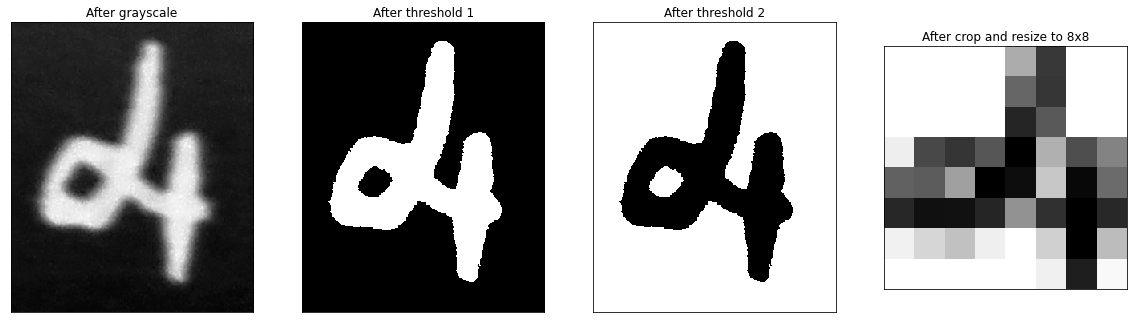

Result predicted: [4]
Real label: 4


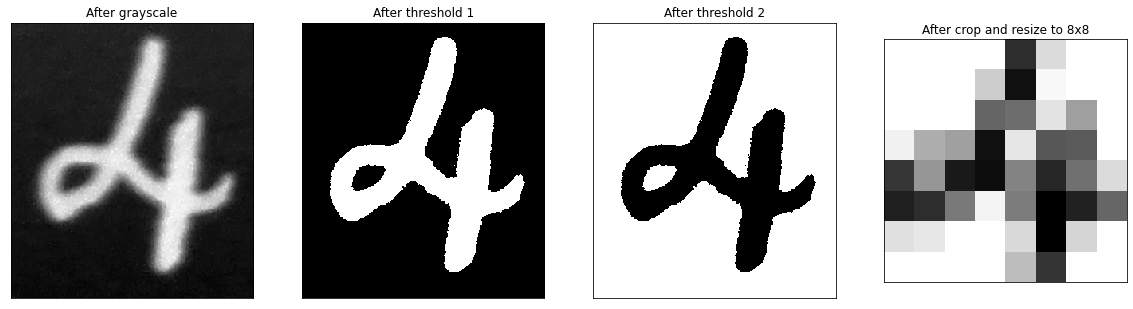

Result predicted: [4]
Real label: 4


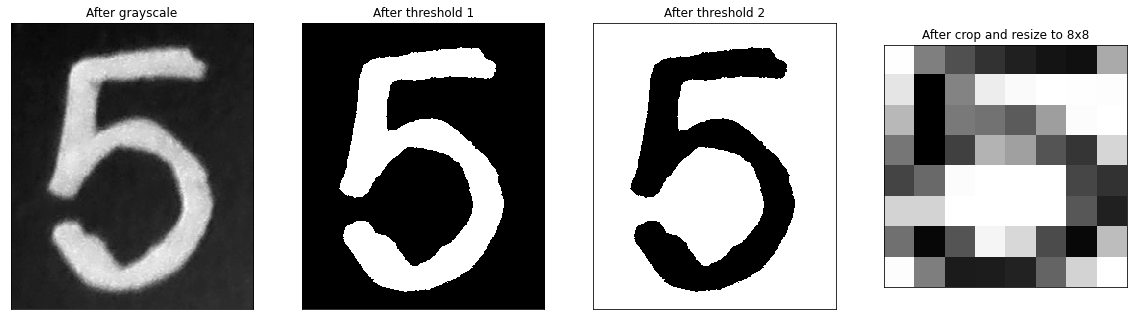

Result predicted: [5]
Real label: 5


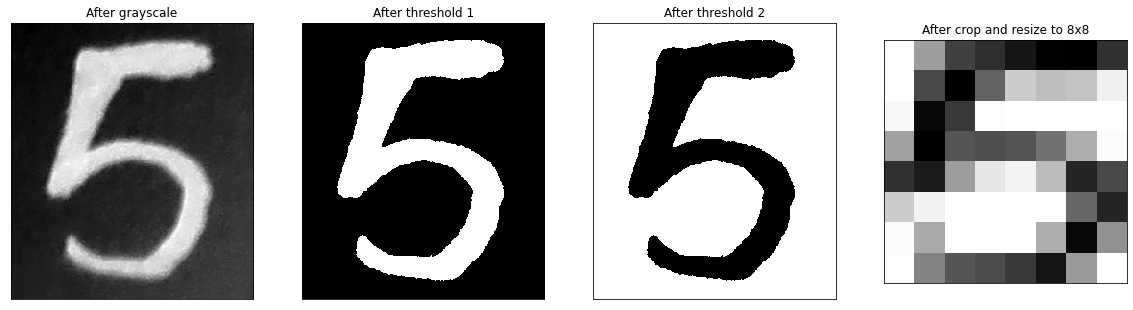

Result predicted: [5]
Real label: 5


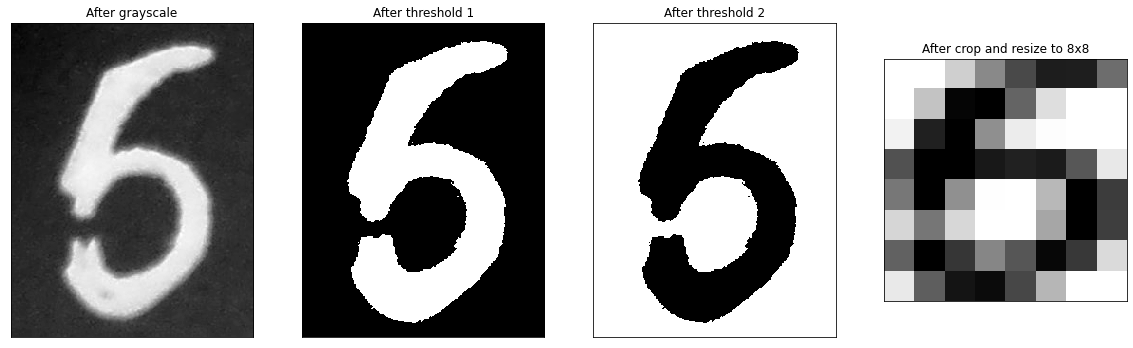

Result predicted: [5]
Real label: 5


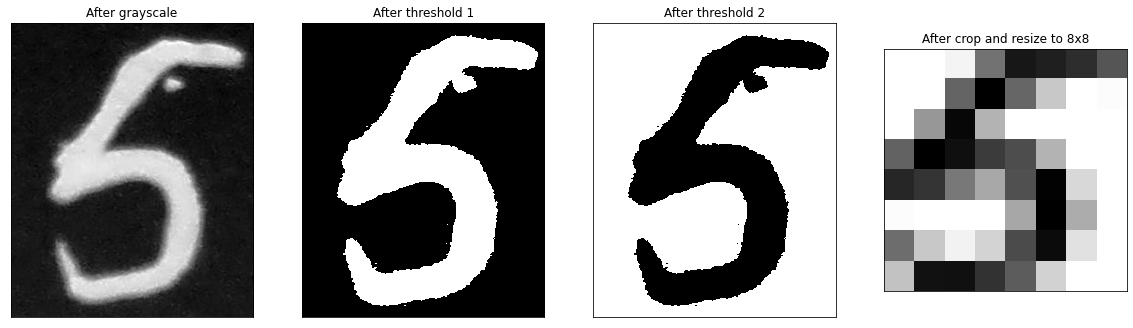

Result predicted: [5]
Real label: 5


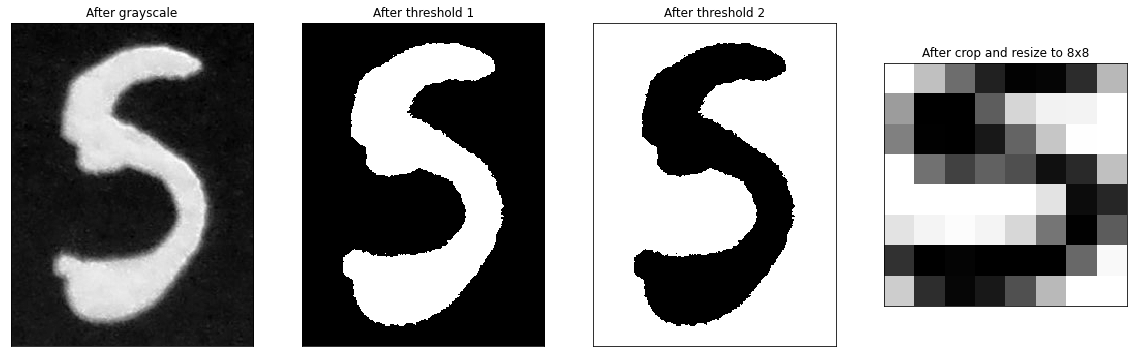

Result predicted: [5]
Real label: 5


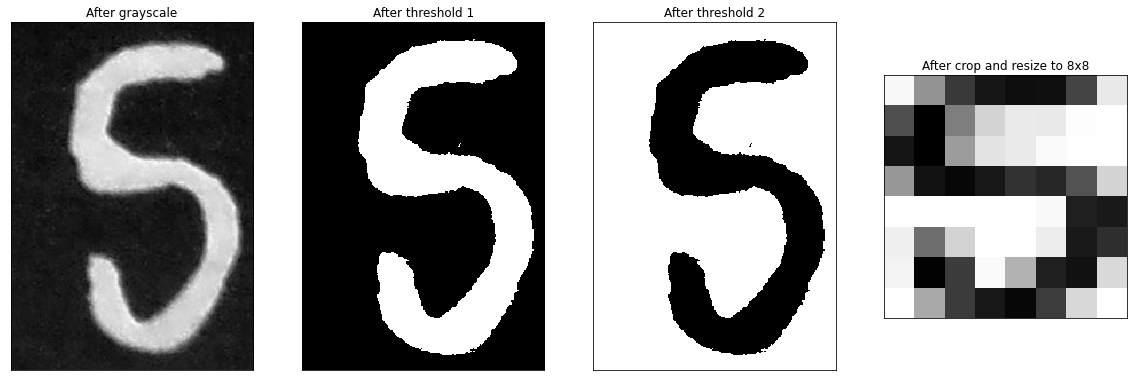

Result predicted: [5]
Real label: 5


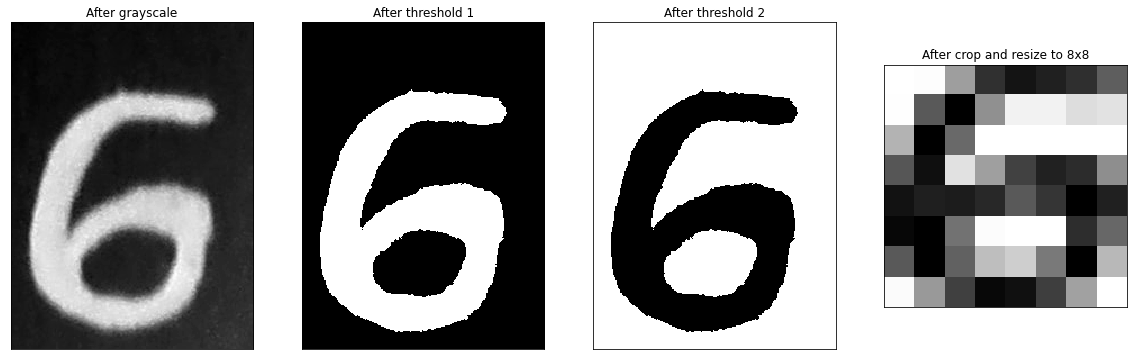

Result predicted: [5]
Real label: 6


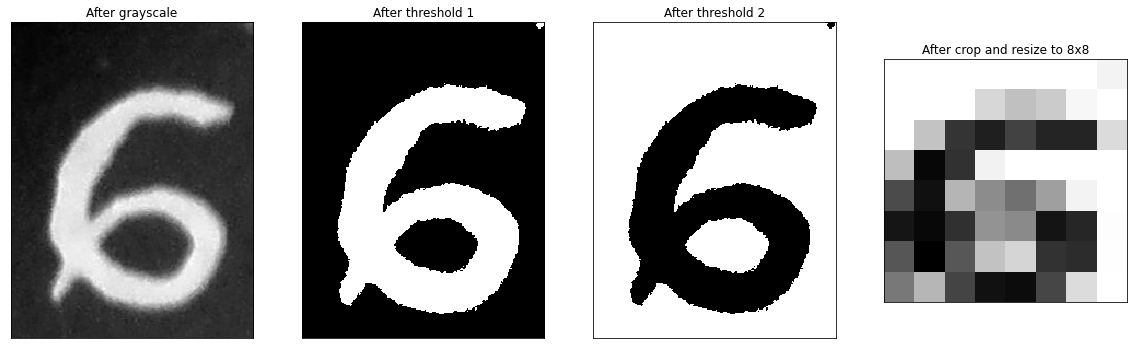

Result predicted: [4]
Real label: 6


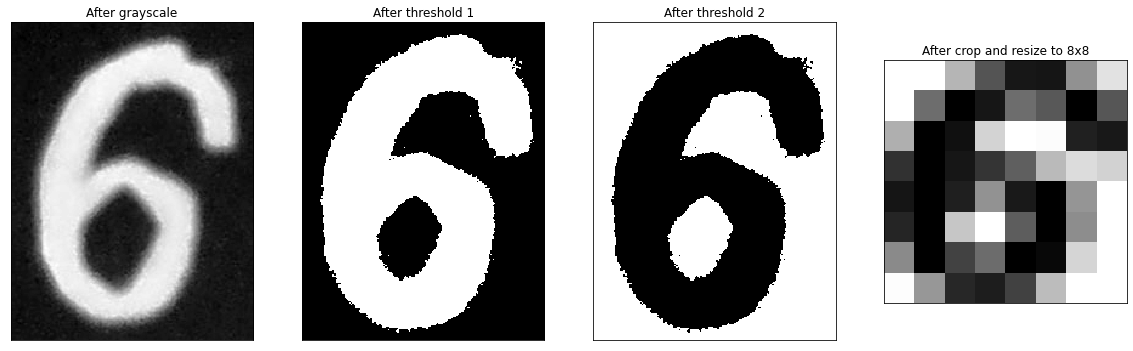

Result predicted: [5]
Real label: 6


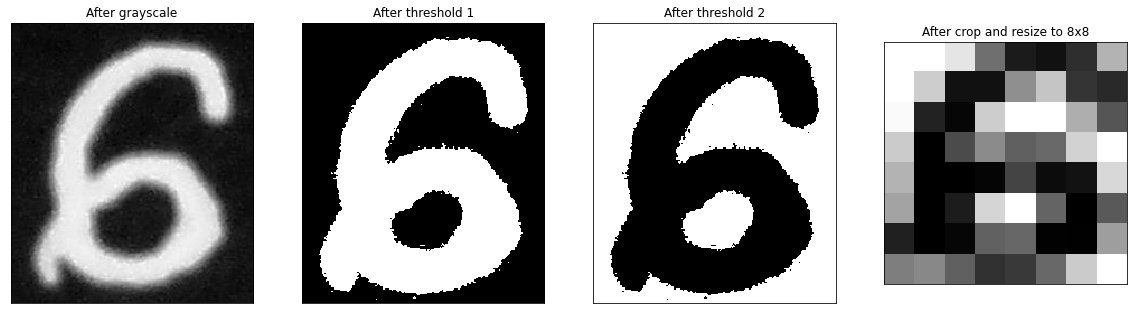

Result predicted: [5]
Real label: 6


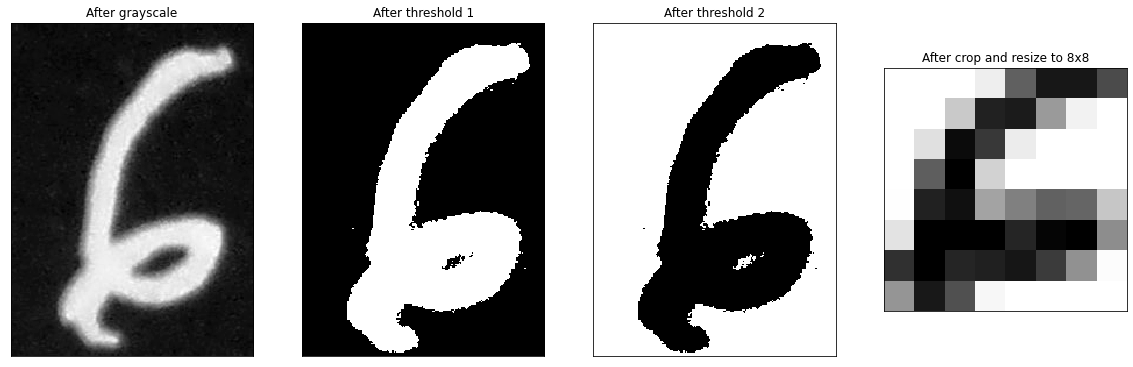

Result predicted: [4]
Real label: 6


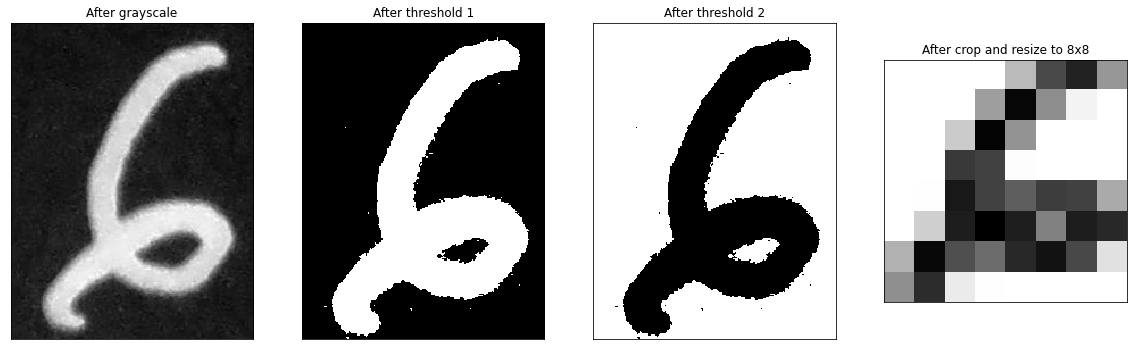

Result predicted: [4]
Real label: 6


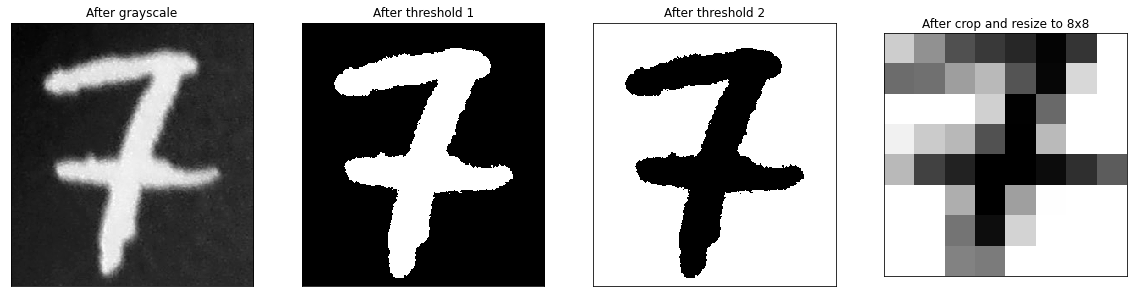

Result predicted: [7]
Real label: 7


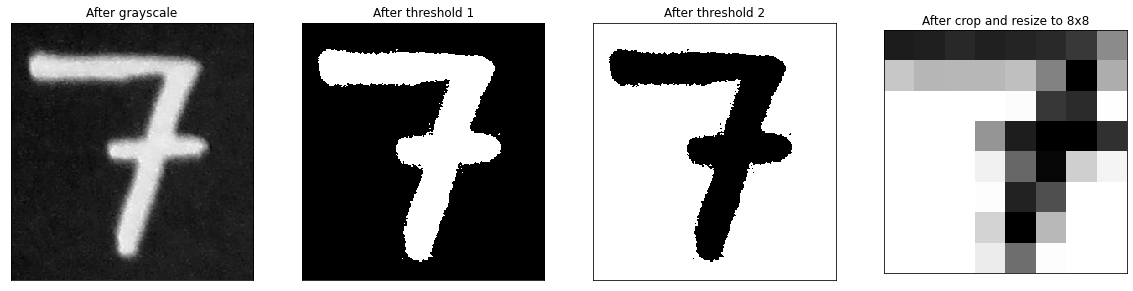

Result predicted: [7]
Real label: 7


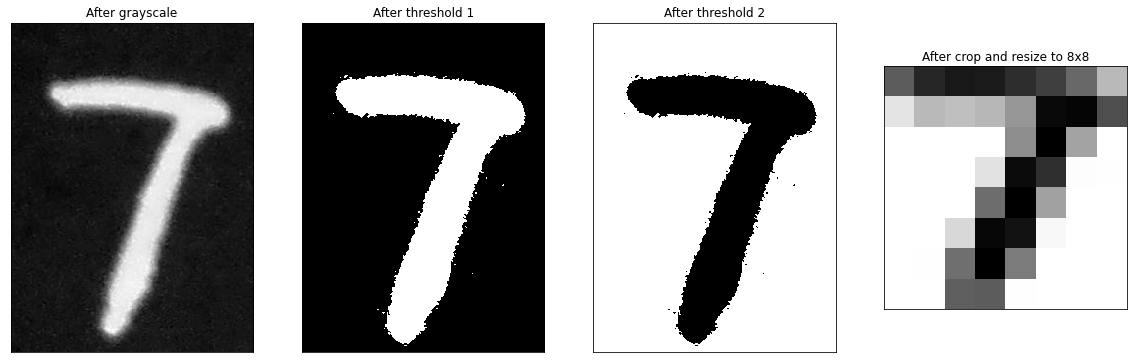

Result predicted: [7]
Real label: 7


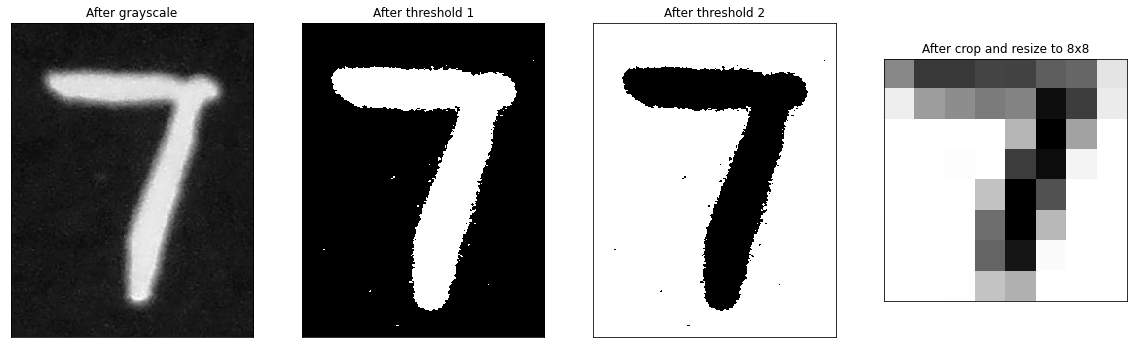

Result predicted: [7]
Real label: 7


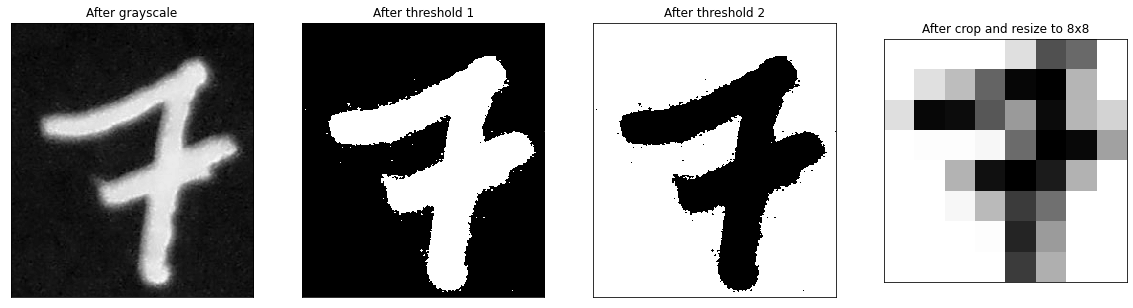

Result predicted: [7]
Real label: 7


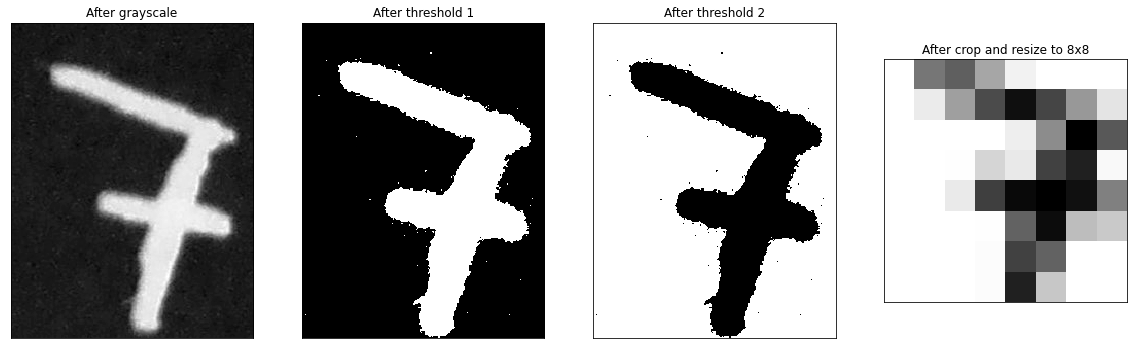

Result predicted: [7]
Real label: 7


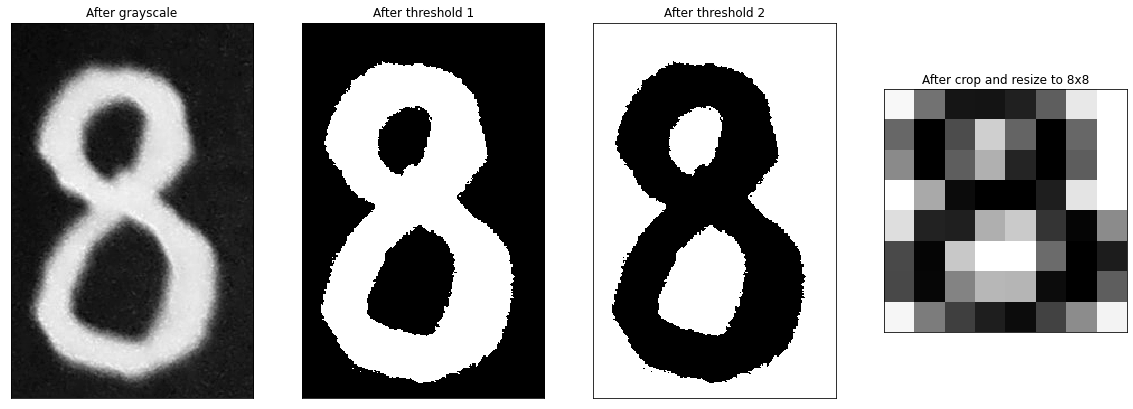

Result predicted: [9]
Real label: 8


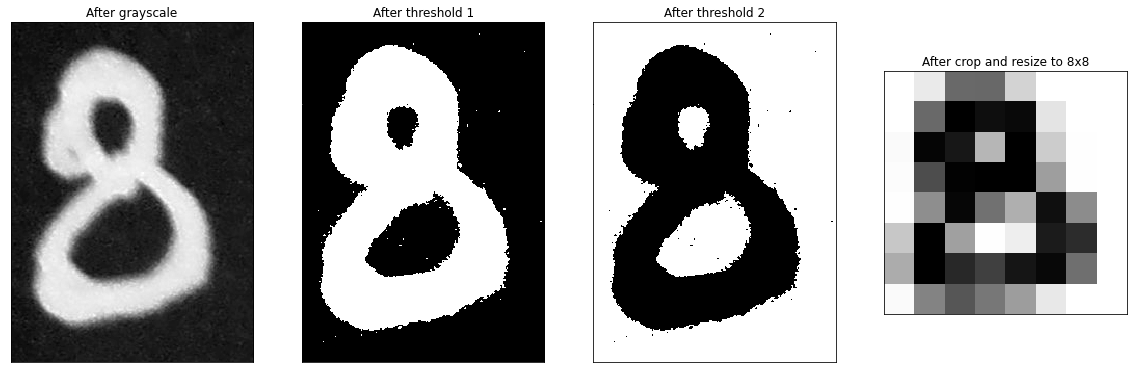

Result predicted: [5]
Real label: 8


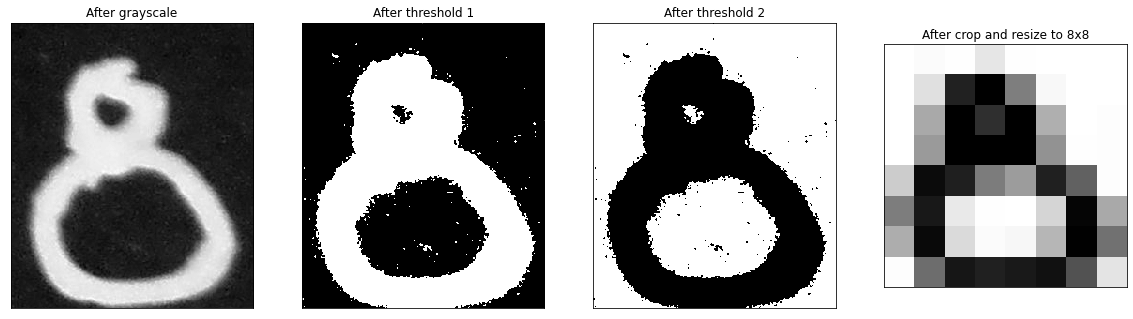

Result predicted: [9]
Real label: 8


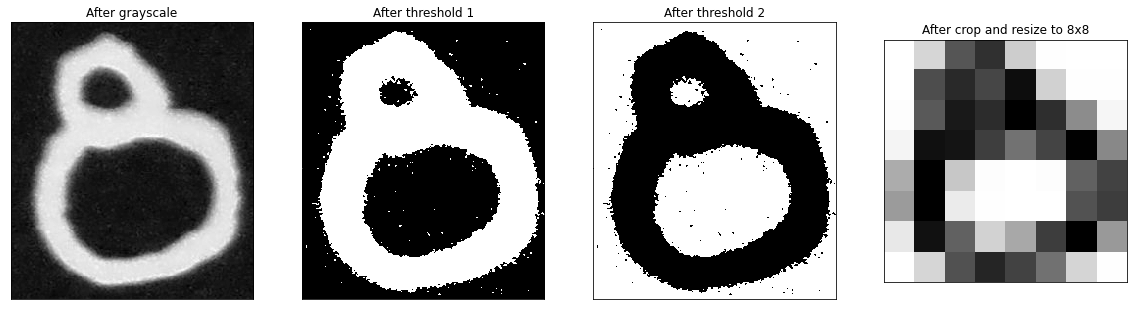

Result predicted: [9]
Real label: 8


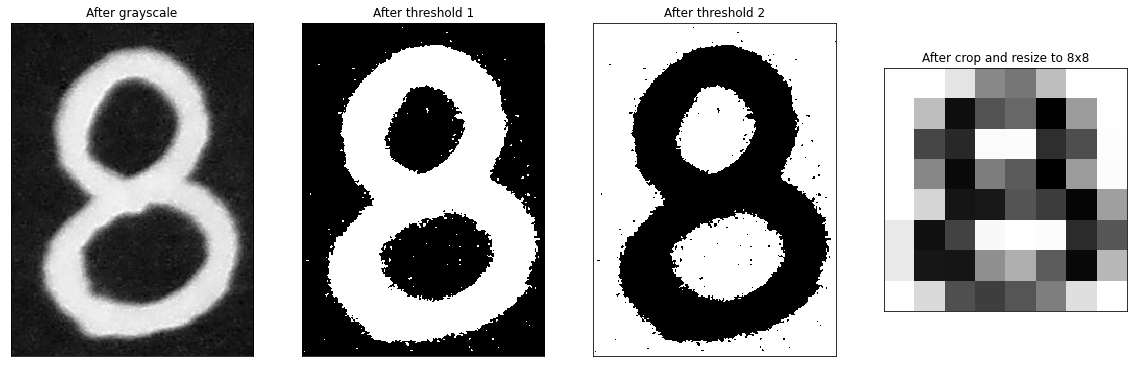

Result predicted: [9]
Real label: 8


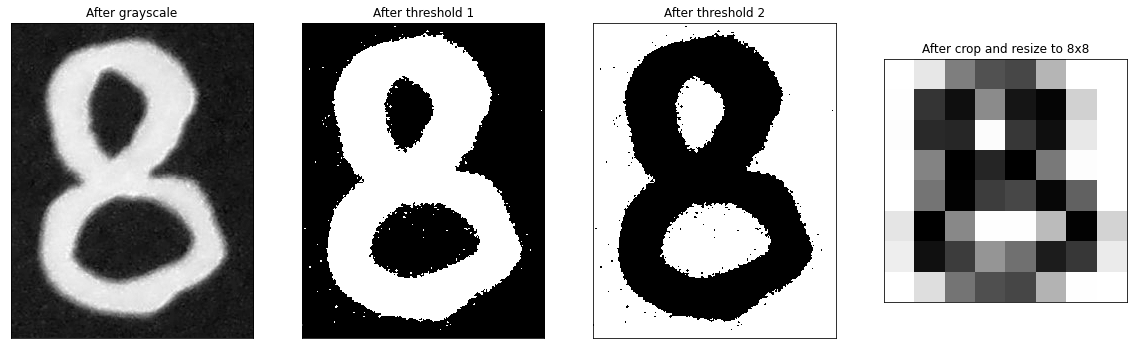

Result predicted: [9]
Real label: 8


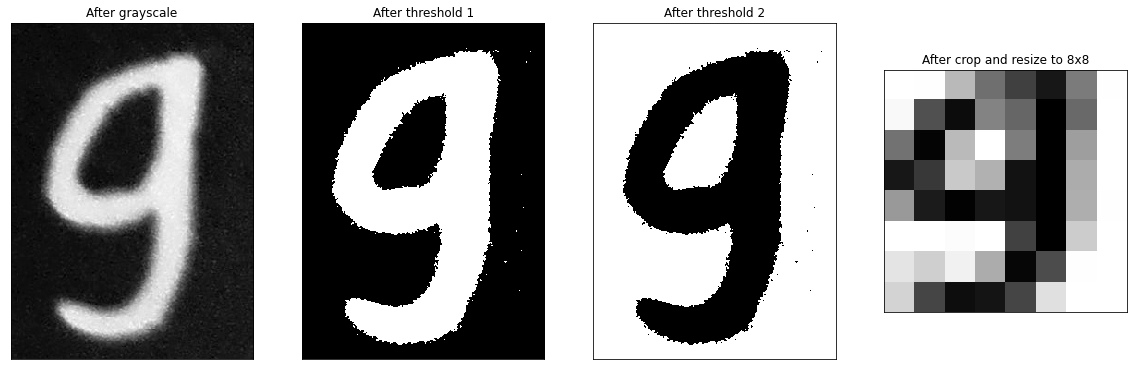

Result predicted: [7]
Real label: 9


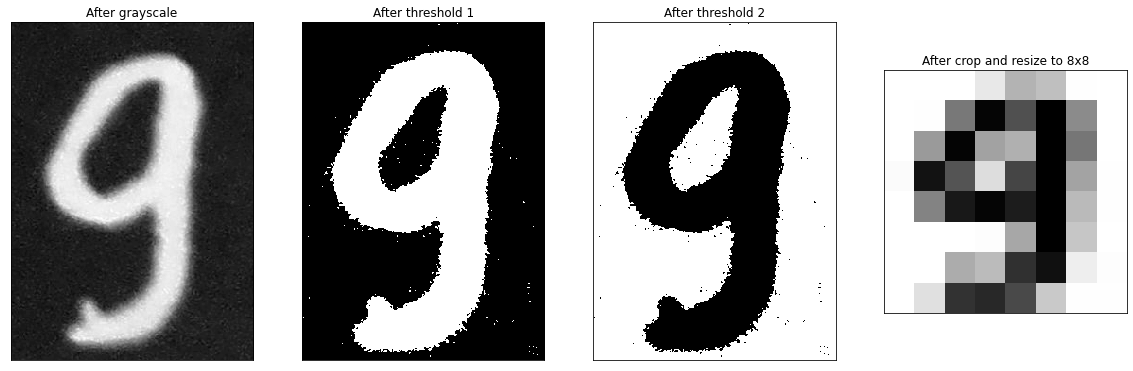

Result predicted: [9]
Real label: 9


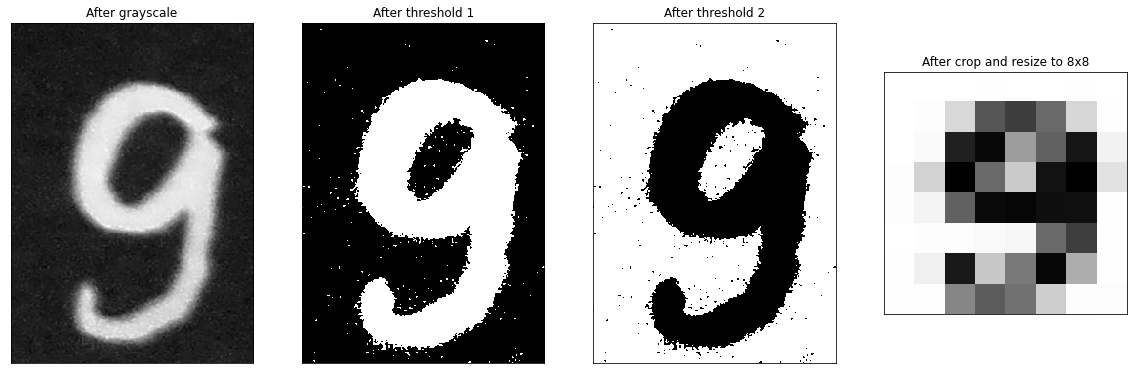

Result predicted: [9]
Real label: 9


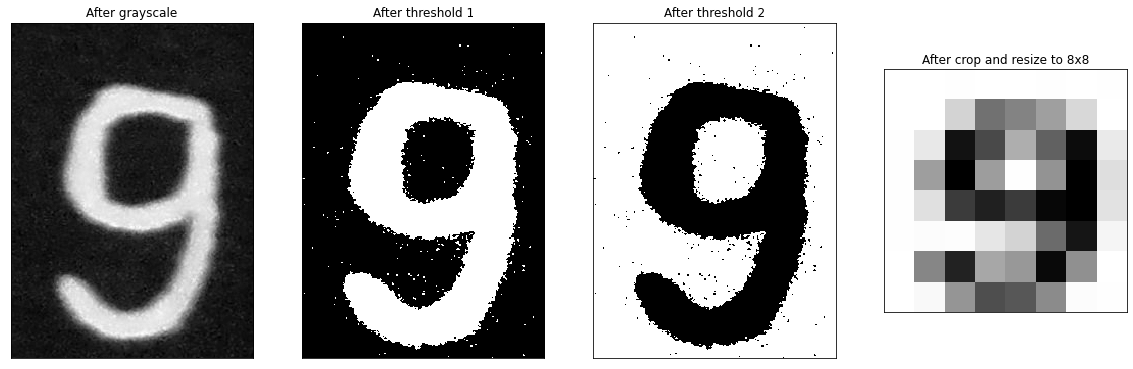

Result predicted: [9]
Real label: 9


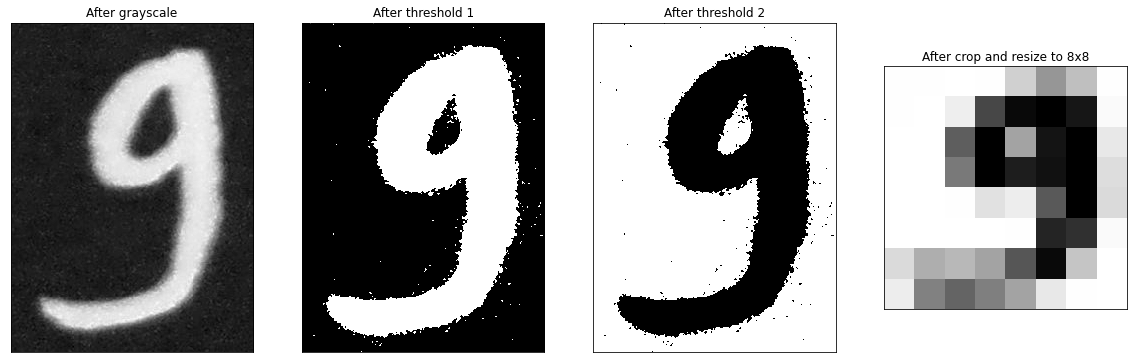

Result predicted: [9]
Real label: 9


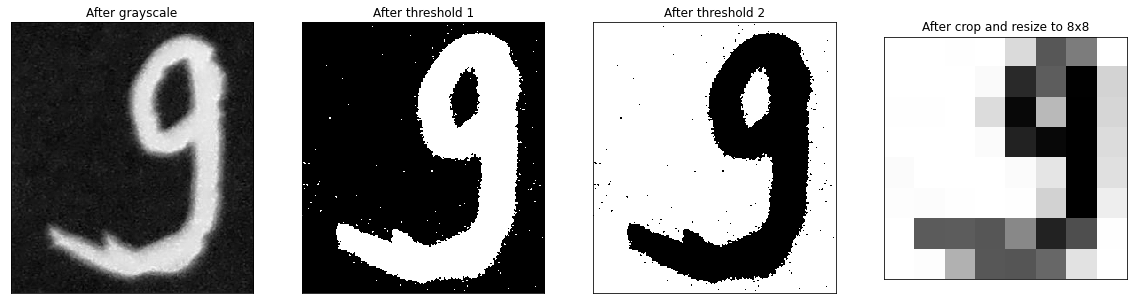

Result predicted: [9]
Real label: 9


In [ ]:
#Lưu lại kết quả predict
pre=[]
for i in range(60):
  pre.append(result_predicted(image_data[i],i))

In [ ]:
#print(pre)

In [ ]:
from sklearn.metrics import accuracy_score
print("Accuracy of new test set: {}".format(accuracy_score(label,pre)))

Accuracy of new test set: 0.5166666666666667


#Đếm số lượng predict khớp với real label

In [ ]:
sl_true=0
for i in range(len(label)):
  if(label[i]==pre[i]):
    sl_true+=1
print("So luong predict khop voi real label:",sl_true)
sl_tung_so=np.zeros(10,dtype=int)
for i in range(10):
  for j in range(6):
    if(pre[i*6+j]==label[i*6+j]):
      sl_tung_so[i]+=1
for i in range(10):
  print("So luong so {} predict dung: {}".format(i,sl_tung_so[i]))


So luong predict khop voi real label: 31
So luong so 0 predict dung: 0
So luong so 1 predict dung: 6
So luong so 2 predict dung: 4
So luong so 3 predict dung: 0
So luong so 4 predict dung: 4
So luong so 5 predict dung: 6
So luong so 6 predict dung: 0
So luong so 7 predict dung: 6
So luong so 8 predict dung: 0
So luong so 9 predict dung: 5


##Nhận xét
Mô hình chỉ dự đoán được các số: 1,2,4,5,7,9 trong 60 test đưa vào
<br>
Các chữ số 0,3,6,8 hầu như đều dự đoán sai
<br>
Có 3 chữ số có kết quả dự đoán tốt (tất cả đều đúng): 1,5,7
<br>
Ngoài ra:
* Số 2: sai 2 số - đúng 4 số
* Số 4: sai 2 số - đúng 4 số
* Số 9: sai 1 số - đúng 5 số
<br>
Chi tiết các số mô hình predict sai:
* Số 0: predict là 1: 2 ảnh, predict là 2: 1 ảnh, predict là 5: 3 ảnh
* Số 2: predict là 5: 2 ảnh
* Số 3: predict là 5: 2 ảnh, predict là 9: 4 ảnh
* Số 4: predict là 1: 2 ảnh
* Số 6: predict là 4: 3 ảnh, predict là 5: 3 ảnh
* Số 8: predict là 5: 1 ảnh, predict là 9: 5 ảnh
* Số 9: predict là 7: 1 ảnh

#Kết luận
1. Với mắt thường ta cũng có thể thấy được, với ảnh chụp thực tế cùng chữ số viết tay, kết quả đưa ra rất tệ, không chính xác.
2. Bằng chứng là nhìn vào 60 ảnh đã dự đoán ở trên với accuracy là: 0.5166666666666667. Hay chỉ có 31 ảnh dự đoán đúng với label thực sự của nó trong 60 ảnh đã đem đi predict. 
<br>
Có tổng cộng 10 chữ số viết tay, mô hình chỉ nhận ra 6 số, 4 chữ số còn lại (tổng cộng 4x6=24 ảnh) đều không có khả năng recognize.
3. Lý do không tốt: 
<br>
Dữ liệu không đồng nhất vì 1 số lý do: độ phân giải camera khác biệt, khi resize lại ảnh đã chụp thì ảnh sẽ bị biến đổi rất nhiều như ta đã thấy trong phần display.
<br>
Khâu xử lý còn có thiếu sót: resize, cropping...
<br>
Chữ số viết tay có nhiều kiểu khác nhau, số này với số kia có thể viết trông tương tự nhau, có lúc con người còn có thể nhầm lẫn. VD: 1 và 7; 3 và 9; 1 và 4: 6 và 5; 8 và 9;...
4. Không thể dùng model digits recognition này vào các bài toán phức tạp hơn như nhận dạng biển số nhà. Nếu muốn sử dụng nó thì buộc lòng phải có dataset mới để training model
